<a href="https://colab.research.google.com/github/krishchat/Case-Study-on-Movie-Lens/blob/main/Movie_Lens_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

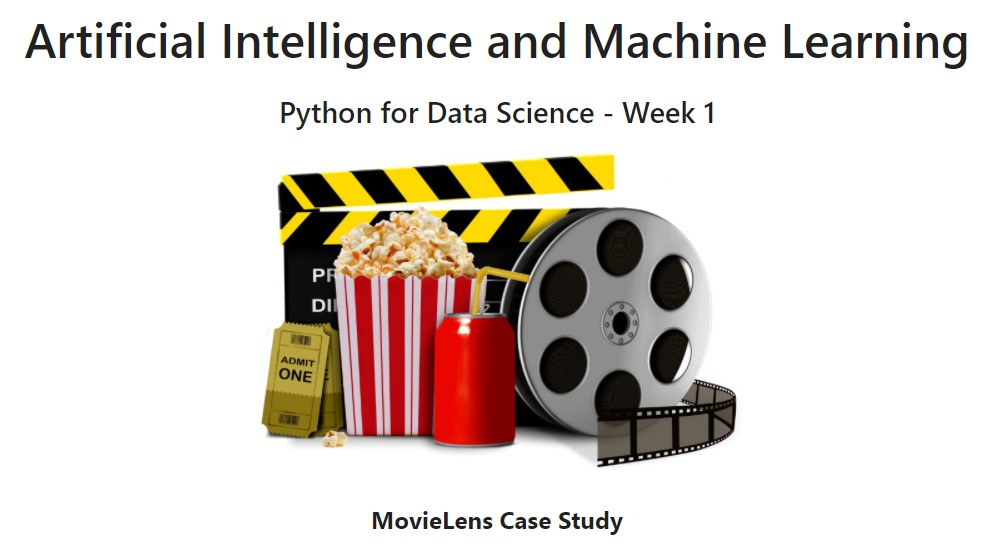

**Session Agenda**

1.   Introduction to Numpy and Pandas
2.   Overview of the datasets
2.   Getting Familiar with Pandas functions
2.   Extracting useful insights from the data






**Objective**

You have got hired as a Data Scientist for the company. The company has provided you with the following three datasets and asked you to carry out a detailed analysis of the data in order to understand the movies and the audiences who've grown up watching these classics.

The key questions that needs to be answered with the help of this analysis are listed below:




1. What is the trend of the number of movies released after 1990?
2. How many movies belong to a particular genre?
3. Which movies have more than one genre?
4. Which of the genres are most liked by the users?
5. Which of the movies have been most rated by the users?
6. What are the top 10 movies that have received most rating counts?
7. Is there any relationship between demographic details of the users and ratings for the movies?





In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/PGP - AI ML Course/MLS - 1 - Movie Lens/movie.csv')
movies.head(3)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-01-1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-01-1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-01-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
users = pd.read_csv('/content/drive/MyDrive/PGP - AI ML Course/MLS - 1 - Movie Lens/user.csv')
ratings = pd.read_csv('/content/drive/MyDrive/PGP - AI ML Course/MLS - 1 - Movie Lens/ratings.csv')

In [ ]:
users.head(5)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
ratings.head(4)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923


# 1. What is the trend of the number of movies released after 1990?

In [ ]:
import datetime
from datetime import date as dt

q_date = pd.to_datetime('01-01-1990', format='%d-%m-%Y')

movies['release date'] = pd.to_datetime(movies['release date'], format='%d-%m-%Y')

In [ ]:
post_1990_movies = movies[movies['release date'] > q_date]

movies_by_type = post_1990_movies[['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                  'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum().sort_values()

In [ ]:
movies['release Year'] = movies['release date'].dt.year

movies['release Year']

movies_by_count = movies[movies['release Year'] > 1990]['release Year'].value_counts()

In [ ]:
movies_by_count

1996    355
1997    286
1995    220
1994    214
1993    126
1998     65
1992     37
1991     22
Name: release Year, dtype: int64

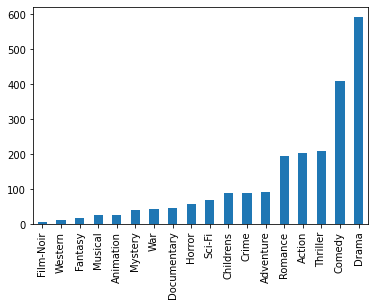

In [ ]:
movies_by_type.plot(kind = 'bar')

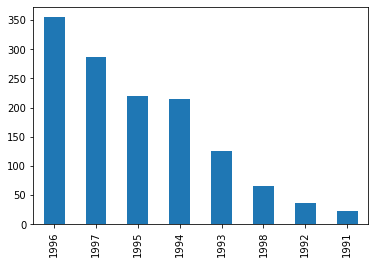

In [ ]:
movies_by_count.plot(kind = 'bar')

# 2. How many movies belong to a particular genre?

In [ ]:
movies[['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                  'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum().sort_values(ascending = False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

# 3. Which movies have more than one genre?

In [ ]:
genres = ['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies['Genre Score'] = movies.loc[:,genres].sum(axis = 1)

In [ ]:
movies[movies['Genre Score'] > 1].shape[0]

849

In [ ]:
Perc = (movies[movies['Genre Score'] > 1].shape[0] / movies.shape[0]) * 100
print('{0:.3f}% movies has more than 1 genre'.format(Perc))

50.536% movies has more than 1 genre


# 4. Which of the genres are most liked by the users?

In [ ]:
ratings.head(5)

merged_mv_data = pd.merge(movies, ratings, how= 'inner', on='movie id', )

merged_mv_data.head(4)

ratings.head(4)


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923


In [ ]:
def getAvgRating(pMovieID):
  return ratings[ratings['movie id'] == pMovieID]['rating'].mean()

In [ ]:
movies['Avg. Rating'] = movies['movie id'].apply(getAvgRating)

movies.head(5)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release Year,Genre Score,Avg. Rating
0,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995,3,3.878319
1,2,GoldenEye,1995-01-01,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995,3,3.206107
2,3,Four Rooms,1995-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995,1,3.033333
3,4,Get Shorty,1995-01-01,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995,3,3.550239
4,5,Copycat,1995-01-01,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995,3,3.302326


In [ ]:
import numpy as np

# creating an empty dataframe
mean_rating = pd.DataFrame()
genres = movies.columns[3:21]
# Iterating through the columns of df_merge to extract and store the ratings for each genre
for i in genres:
  mean_rating[i] = np.where(merged_mv_data[i]==1,merged_mv_data['rating'],np.nan)

# printing the newly created dataframe
mean_rating.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mean_rating.mean(axis = 0).sort_values(ascending = False)

Film-Noir      3.921523
War            3.815812
Drama          3.687379
Documentary    3.672823
Mystery        3.638132
Crime          3.632278
Romance        3.621705
Western        3.613269
Animation      3.576699
Sci-Fi         3.560723
Musical        3.521397
Thriller       3.509007
Adventure      3.503527
Action         3.480245
Comedy         3.394073
Childrens      3.353244
Horror         3.290389
Fantasy        3.215237
dtype: float64

# 5. Which of the movies have been most rated by the users?

In [ ]:
most_rated_movies = movies[movies['Avg. Rating'] == 5][['movie title', 'Avg. Rating']].reset_index(drop=True)
most_rated_movies

,movie title,Avg. Rating
0,"Great Day in Harlem, A",5.0
1,They Made Me a Criminal,5.0
2,Prefontaine,5.0
3,Marlene Dietrich: Shadow and Light (,5.0
4,Star Kid,5.0
5,"Saint of Fort Washington, The",5.0
6,Santa with Muscles,5.0
7,Aiqing wansui,5.0
8,Someone Else's America,5.0
9,Entertaining Angels: The Dorothy Day Story,5.0


# 6. What are the top 10 movies that have received most rating counts?

In [ ]:
movies.drop(columns= ['release Year','Genre Score', 'Avg. Rating'], inplace=True)

In [ ]:
most_rating_counts = pd.merge(movies, ratings, how = 'inner', on = 'movie id')

In [ ]:
most_rating_counts = most_rating_counts[['movie title', 'user id', 'rating']]

In [ ]:
most_rating_counts = most_rating_counts.groupby(['movie title']).size().reset_index(name = 'Counts')

In [ ]:
most_rating_counts = most_rating_counts.sort_values(by = 'Counts', ascending = False)

In [ ]:
most_rating_counts.iloc[0:10,:]

,movie title,Counts
1393,Star Wars,583
332,Contact,509
497,Fargo,508
1232,Return of the Jedi,507
858,Liar Liar,485
459,"English Patient, The",481
1280,Scream,478
1517,Toy Story,452
32,Air Force One,431
742,Independence Day (ID4),429


# 7. Is there any relationship between demographic details of the users and ratings for the movies?

In [ ]:
users.head(10)

user_ratings = pd.merge(users, ratings, how='inner', on='user id')

user_ratings.groupby('gender').rating.mean()

gender
F    3.531507
M    3.529289
Name: rating, dtype: float64

In [ ]:
user_ratings.groupby(['gender','occupation']).rating.mean().sort_values(ascending = False)

gender  occupation   
M       none             3.878731
        artist           3.875841
F       salesman         3.870206
        administrator    3.781839
        executive        3.773756
        engineer         3.751724
M       lawyer           3.741379
F       educator         3.698857
M       doctor           3.688889
F       writer           3.663986
M       educator         3.660246
        healthcare       3.639839
        scientist        3.637311
F       none             3.632877
        lawyer           3.623188
        student          3.602879
        librarian        3.580070
        programmer       3.577566
M       programmer       3.567732
        other            3.563447
        administrator    3.555233
        technician       3.540612
        librarian        3.537920
        engineer         3.537609
F       other            3.531241
        marketing        3.522624
M       homemaker        3.500000
        student          3.484411
        retired          3

In [ ]:
user_movies_ratings = pd.merge(movies, user_ratings, on='movie id', how = 'inner')

In [ ]:
user_movies_ratings[(user_movies_ratings['occupation'] == 'healthcare') & (user_movies_ratings['rating'] >= 4)][genres].sum().reset_index()

,index,0
0,Action,244
1,Adventure,132
2,Animation,31
3,Childrens,65
4,Comedy,209
5,Crime,78
6,Documentary,12
7,Drama,466
8,Fantasy,11
9,Film-Noir,21
